In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset_train=pd.read_csv(r'Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
dataset_train.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
X = dataset_train.iloc[:,1:2].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [7]:
x_train=[]
y_train=[]
for i in range(60, 1258):
    x_train.append(X[i-60:i,0])
    y_train.append(X[i,0])

In [8]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [11]:
X.shape

(1258, 1)

In [12]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [13]:
x_train.shape

(1198, 60, 1)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [16]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.0))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.1))

In [17]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [18]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [21]:
regressor.fit(x_train,y_train,epochs=200,batch_size=32)

Epoch 1/200
38/38 [==============================] - 4s 32ms/step - loss: 0.0342
Epoch 2/200
38/38 [==============================] - 1s 32ms/step - loss: 0.0061
Epoch 3/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0051
Epoch 4/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0053
Epoch 5/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0055
Epoch 6/200
38/38 [==============================] - 1s 30ms/step - loss: 0.0049
Epoch 7/200
38/38 [==============================] - 1s 30ms/step - loss: 0.0042
Epoch 8/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0048
Epoch 9/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0040
Epoch 10/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0039
Epoch 11/200
38/38 [==============================] - 1s 32ms/step - loss: 0.0046
Epoch 12/200
38/38 [==============================] - 1s 32ms/step - loss: 0.0042
Epoch 13/200
38/38 [=====

38/38 [==============================] - 1s 31ms/step - loss: 0.0012
Epoch 102/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0011
Epoch 103/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0014
Epoch 104/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0013
Epoch 105/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0012
Epoch 106/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0013
Epoch 107/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0012
Epoch 108/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0012
Epoch 109/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0012
Epoch 110/200
38/38 [==============================] - 1s 30ms/step - loss: 0.0013
Epoch 111/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0012
Epoch 112/200
38/38 [==============================] - 1s 31ms/step - loss: 0.0012
Epoch 113/200
38/3

38/38 [==============================] - 1s 33ms/step - loss: 9.3039e-04
Epoch 198/200
38/38 [==============================] - 1s 33ms/step - loss: 9.1638e-04
Epoch 199/200
38/38 [==============================] - 1s 33ms/step - loss: 0.0010
Epoch 200/200
38/38 [==============================] - 1s 33ms/step - loss: 0.0011


In [ ]:
dataset_test=pd.read_csv(r'Google_Stock_Price_Test.csv')

In [24]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [25]:
dataset_test.shape

(20, 6)

In [29]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [30]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [32]:
dataset_total=pd.concat((dataset_train['Open'], dataset_test['Open']),axis=0)

In [33]:
dataset_total.head()

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [34]:
dataset_total.shape

(1278,)

In [35]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [36]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [37]:
inputs=inputs.reshape(-1,1)

In [38]:
inputs.shape

(80, 1)

In [39]:
inputs=sc.transform(inputs)

In [40]:
inputs[0]

array([0.9299055])

In [41]:
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)    

In [42]:
x_test.shape

(20, 60)

In [43]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [44]:
x_test.shape

(20, 60, 1)

In [45]:
predicted_stock_price=regressor.predict(x_test)

1/1 [==============================] - 1s 621ms/step


In [46]:
predicted_stock_price

array([[0.94717264],
       [0.9427868 ],
       [0.95413494],
       [0.95266163],
       [0.96234727],
       [0.9788126 ],
       [0.9816673 ],
       [0.9766567 ],
       [0.97928774],
       [0.9812902 ],
       [0.9810586 ],
       [0.9796331 ],
       [0.9791    ],
       [0.98213696],
       [0.9836389 ],
       [1.0042698 ],
       [1.0173575 ],
       [1.0287396 ],
       [1.0264397 ],
       [1.0005544 ]], dtype=float32)

In [47]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [48]:
predicted_stock_price

array([[788.2821 ],
       [785.92444],
       [792.0248 ],
       [791.2328 ],
       [796.4394 ],
       [805.29047],
       [806.825  ],
       [804.13153],
       [805.5459 ],
       [806.6224 ],
       [806.49786],
       [805.73157],
       [805.44495],
       [807.0775 ],
       [807.8849 ],
       [818.9753 ],
       [826.0107 ],
       [832.1292 ],
       [830.8929 ],
       [816.978  ]], dtype=float32)

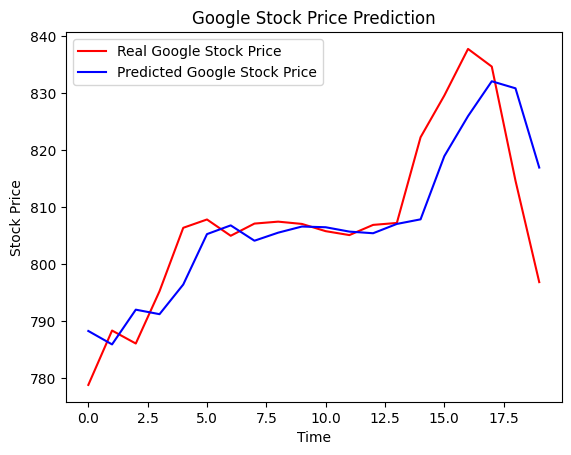

In [50]:
plt.plot(real_stock_price, color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()